### 1. Benchmarking Regression - Bike Sharing Demand

Dataset 1- Heart Disease Dataset

In [2]:
import pandas as pd

heart_classification = pd.read_csv(
    "C:\\Users\\himan\\OneDrive\\Documents\\Study Docs\\Python VS Code\\ML From Scratch\\Datasets\\heart_classification.csv"
)
heart_classification = heart_classification.drop(columns=["Unnamed: 0"])
heart_classification.columns = [col.lower() for col in heart_classification.columns]

heart_classification["ahd"] = heart_classification["ahd"].apply(
    lambda col: 1 if col == "Yes" else 0
)
heart_classification = heart_classification.dropna()
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
heart_classification_train, heart_classification_test = train_test_split(
    heart_classification, test_size=0.2, random_state=24, shuffle=True
)

heart_classification_train.groupby("ahd").size() / heart_classification_train.shape[0]

ahd
0    0.561181
1    0.438819
dtype: float64

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from typing import Union


def transform_data(
    df: pd.DataFrame, exclude_cols: list = None
) -> Union[pd.DataFrame, ColumnTransformer]:
    """
    Transform the data by one-hot encoding object columns and scaling numeric columns.

    Parameters:
    - df (DataFrame): The data to transform.
    - exclude_cols (list, optional): A list of columns to exclude from transformation. Defaults to None.

    Returns:
    - transformed_df (DataFrame): The transformed data.
    """
    # Get the column types
    object_cols = df.select_dtypes(include=["object"]).columns
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

    # Exclude the specified columns
    if exclude_cols:
        object_cols = [col for col in object_cols if col not in exclude_cols]
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    # Create the transformers
    onehot_encoder = OneHotEncoder(handle_unknown="ignore")
    scaler = StandardScaler()

    # Create the column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("onehot", onehot_encoder, object_cols),
            ("scaler", scaler, numeric_cols),
        ],
        remainder="passthrough",
    )

    # Use the preprocessor to transform the data
    transformed_df = preprocessor.fit_transform(df)

    # Convert the transformed data to a DataFrame
    transformed_df = pd.DataFrame(
        transformed_df, columns=preprocessor.get_feature_names_out()
    )

    return transformed_df, preprocessor


heart_classification_train2, preprocessor_obj = transform_data(
    heart_classification_train, exclude_cols=["ahd"]
)
heart_classification_test2 = pd.DataFrame(
    preprocessor_obj.transform(heart_classification_test),
    columns=preprocessor_obj.get_feature_names_out(),
)
heart_classification_test2.dtypes

onehot__chestpain_asymptomatic    float64
onehot__chestpain_nonanginal      float64
onehot__chestpain_nontypical      float64
onehot__chestpain_typical         float64
onehot__thal_fixed                float64
onehot__thal_normal               float64
onehot__thal_reversable           float64
scaler__age                       float64
scaler__sex                       float64
scaler__restbp                    float64
scaler__chol                      float64
scaler__fbs                       float64
scaler__restecg                   float64
scaler__maxhr                     float64
scaler__exang                     float64
scaler__oldpeak                   float64
scaler__slope                     float64
scaler__ca                        float64
remainder__ahd                    float64
dtype: object

In [ ]:
import numpy as np

# ss = np.array([1, 2, 5, 6, 3])
# bb = np.array([6, 5, 6, 2, 8])
# bb[ss > 2.5]

# ss = np.array([1.0,1,2,0,0,9])
# print(np.argmax(np.bincount(ss)))

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [4]:
from pycaret.classification import ClassificationExperiment

# Create an instance of ClassificationExperiment
exp = ClassificationExperiment()

# Set up the classification environment
exp.setup(data=heart_classification_train2, target="remainder__ahd", session_id=123)

# Compare all models and select the best one
best_model = exp.compare_models()

# Evaluate the best model on the test set
predictions = exp.predict_model(best_model, data=heart_classification_test2)

# Display the results
print(predictions)

,Description,Value
0,Session id,123
1,Target,remainder__ahd
2,Target type,Binary
3,Original data shape,"(237, 19)"
4,Transformed data shape,"(237, 19)"
5,Transformed train set shape,"(165, 19)"
6,Transformed test set shape,"(72, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8235,0.8653,0.7482,0.8332,0.7825,0.6358,0.6432,0.6380
knn,K Neighbors Classifier,0.8184,0.8437,0.8054,0.8034,0.7938,0.6344,0.6471,0.5780
ridge,Ridge Classifier,0.8180,0.8673,0.7625,0.8125,0.7836,0.6269,0.6314,0.0150
lda,Linear Discriminant Analysis,0.8059,0.8673,0.7625,0.7911,0.7729,0.6033,0.6078,0.0170
nb,Naive Bayes,0.7886,0.8661,0.7518,0.7719,0.7504,0.5704,0.5844,0.0120
lightgbm,Light Gradient Boosting Machine,0.7871,0.8387,0.7357,0.7693,0.7451,0.5643,0.5733,0.0700
xgboost,Extreme Gradient Boosting,0.7824,0.8429,0.7357,0.7644,0.7370,0.5538,0.5689,0.0230
gbc,Gradient Boosting Classifier,0.7761,0.8277,0.6929,0.7811,0.7249,0.5391,0.5506,0.0400
rf,Random Forest Classifier,0.7757,0.8615,0.6946,0.7849,0.7248,0.5394,0.5537,0.0540
et,Extra Trees Classifier,0.7750,0.8550,0.6929,0.7798,0.7277,0.5383,0.5462,0.0650


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8833,0.9259,0.8485,0.9333,0.8889,0.7667,0.7705


    onehot__chestpain_asymptomatic  onehot__chestpain_nonanginal  \
0                              1.0                           0.0   
1                              1.0                           0.0   
2                              1.0                           0.0   
3                              0.0                           1.0   
4                              1.0                           0.0   
5                              0.0                           0.0   
6                              1.0                           0.0   
7                              0.0                           1.0   
8                              1.0                           0.0   
9                              0.0                           0.0   
10                             0.0                           1.0   
11                             1.0                           0.0   
12                             1.0                           0.0   
13                             1.0              

## PCA

In [6]:
heart_classification_train2.columns

Index(['onehot__chestpain_asymptomatic', 'onehot__chestpain_nonanginal',
       'onehot__chestpain_nontypical', 'onehot__chestpain_typical',
       'onehot__thal_fixed', 'onehot__thal_normal', 'onehot__thal_reversable',
       'scaler__age', 'scaler__sex', 'scaler__restbp', 'scaler__chol',
       'scaler__fbs', 'scaler__restecg', 'scaler__maxhr', 'scaler__exang',
       'scaler__oldpeak', 'scaler__slope', 'scaler__ca', 'remainder__ahd'],
      dtype='object')

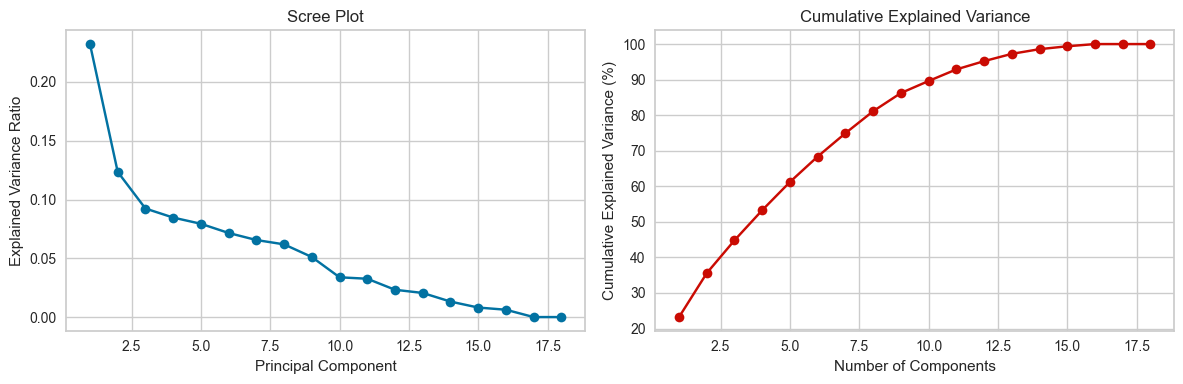

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

heart_classification_train2_pca = heart_classification_train2.drop(
    "remainder__ahd", axis=1
)
# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(heart_classification_train2_pca)

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Scree plot
ax1.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    "bo-",
)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Scree Plot")

# Cumulative variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, "ro-")
ax2.set_xlabel("Number of Components")
ax2.set_ylabel("Cumulative Explained Variance (%)")
ax2.set_title("Cumulative Explained Variance")

plt.tight_layout()
plt.show()

In [8]:
from pycaret.classification import ClassificationExperiment

# First, apply PCA with 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(
    heart_classification_train2.drop("remainder__ahd", axis=1)
)
X_test_pca = pca.transform(heart_classification_test2.drop("remainder__ahd", axis=1))

# Convert PCA results to dataframes with named columns
train_pca_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(10)])
test_pca_df = pd.DataFrame(X_test_pca, columns=[f"PC{i+1}" for i in range(10)])

# Add back the target variable
train_pca_df["remainder__ahd"] = heart_classification_train2["remainder__ahd"]
test_pca_df["remainder__ahd"] = heart_classification_test2["remainder__ahd"]

# Create an instance of ClassificationExperiment
exp = ClassificationExperiment()

# Set up the classification environment with PCA transformed data
exp.setup(data=train_pca_df, target="remainder__ahd", session_id=123)

# Compare all models and select the best one
best_model = exp.compare_models()

# Evaluate the best model on the PCA transformed test set
predictions = exp.predict_model(best_model, data=test_pca_df)

# Display the results
print(predictions)

,Description,Value
0,Session id,123
1,Target,remainder__ahd
2,Target type,Binary
3,Original data shape,"(237, 11)"
4,Transformed data shape,"(237, 11)"
5,Transformed train set shape,"(165, 11)"
6,Transformed test set shape,"(72, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8125,0.8549,0.7679,0.8194,0.7817,0.6197,0.6335,0.0550
lr,Logistic Regression,0.7996,0.8800,0.7518,0.8042,0.7651,0.5928,0.6066,0.6930
xgboost,Extreme Gradient Boosting,0.7945,0.8536,0.7536,0.7795,0.7555,0.5818,0.5925,0.0270
knn,K Neighbors Classifier,0.7930,0.8440,0.7232,0.8065,0.7499,0.5767,0.5925,0.4410
rf,Random Forest Classifier,0.7820,0.8446,0.7125,0.8044,0.7362,0.5558,0.5808,0.0530
ridge,Ridge Classifier,0.7812,0.8800,0.7089,0.7966,0.7350,0.5525,0.5681,0.0140
ada,Ada Boost Classifier,0.7812,0.7923,0.7179,0.7834,0.7351,0.5509,0.5639,0.0350
gbc,Gradient Boosting Classifier,0.7812,0.8561,0.7089,0.8058,0.7231,0.5496,0.5765,0.0380
lda,Linear Discriminant Analysis,0.7812,0.8800,0.7089,0.7966,0.7350,0.5525,0.5681,0.0150
lightgbm,Light Gradient Boosting Machine,0.7757,0.8256,0.7089,0.7821,0.7318,0.5418,0.5569,0.0580


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7833,0.8889,0.7273,0.8571,0.7869,0.5695,0.5775


         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   0.791404 -1.725077 -0.284640 -0.342084 -1.582002  0.567948  0.378739   
1   1.440114 -0.669853 -0.977309 -0.314207 -1.822713  0.274506  1.526937   
2   2.392245 -1.741177 -0.313059  0.422029  0.026273  0.498554  0.378057   
3  -0.379125 -1.630709 -0.386639 -2.622663  1.180894  0.661047 -1.232355   
4   0.994360 -3.144444 -0.726697  0.131092  1.128359  0.467666  0.921859   
5  -0.950129 -1.476643 -0.005802 -0.871439 -0.366660 -0.233707 -0.240595   
6  -0.974913 -0.142564  0.213684  1.359970  1.567862 -0.962277 -0.888984   
7  -1.280288 -0.372641  0.890888 -1.005668 -1.026032 -0.013162 -1.570589   
8   0.770019 -0.891080 -0.469186  1.062002 -0.964597 -1.418321 -0.357770   
9  -2.918149 -0.132814 -0.898777 -0.482073 -0.601454  0.197591  0.759737   
10  1.463819 -0.648854 -1.053109 -0.007348 -0.147899 -1.273361  0.339189   
11 -1.312307  0.831377  0.684305  1.072581  0.776584  0.265085 -0.898761   
12  0.877246

## SVC Visualizer

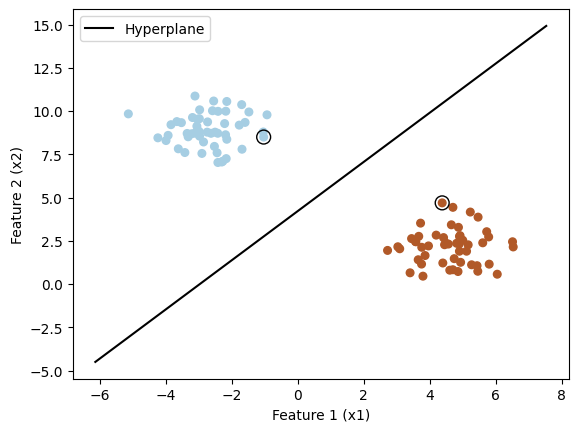

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Create a simple dataset with 2 features (x1 and x2) and 2 classes
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Fit the SVC model with a linear kernel
clf = SVC(kernel="linear")
clf.fit(X, y)

# Get the coefficients (weights) and intercept of the hyperplane
coef = clf.coef_[0]  # Coefficients for the features (x1 and x2)
intercept = clf.intercept_  # Intercept term

# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the hyperplane: w1 * x1 + w2 * x2 + b = 0
# Rearranged to x2 = -(w1/w2) * x1 - b/w2
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1 = np.linspace(x1_min, x1_max)

# Calculate the corresponding x2 values for the hyperplane
x2 = -(coef[0] / coef[1]) * x1 - intercept / coef[1]

# Plot the hyperplane
plt.plot(x1, x2, label="Hyperplane", color="black")

# Highlight support vectors
plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel("Feature 1 (x1)")
plt.ylabel("Feature 2 (x2)")
plt.legend()
plt.show()

xx2 = [[-2.81394838 -2.81394838 -2.81394838 ... -2.81394838 -2.81394838
  -2.81394838]
 [-2.63759555 -2.63759555 -2.63759555 ... -2.63759555 -2.63759555
  -2.63759555]
 [-2.46124272 -2.46124272 -2.46124272 ... -2.46124272 -2.46124272
  -2.46124272]
 ...
 [14.29227593 14.29227593 14.29227593 ... 14.29227593 14.29227593
  14.29227593]
 [14.46862876 14.46862876 14.46862876 ... 14.46862876 14.46862876
  14.46862876]
 [14.64498159 14.64498159 14.64498159 ... 14.64498159 14.64498159
  14.64498159]]
 Z shape before reshape: (10000,)
ravel(len = 10000) = [-10.05856038  -9.85235933  -9.64615828 ...   9.94294149  10.14914254
  10.35534359],  ravel concatenated= [[-10.05856038  -2.81394838]
 [ -9.85235933  -2.81394838]
 [ -9.64615828  -2.81394838]
 ...
 [  9.94294149  14.64498159]
 [ 10.14914254  14.64498159]
 [ 10.35534359  14.64498159]] 
 Z shape: (100, 100) = [[0.02776123 0.02776123 0.02776123 ... 0.09262692 0.07150615 0.05604638]
 [0.02776123 0.02776123 0.02776123 ... 0.10811901 0.08192924 0.

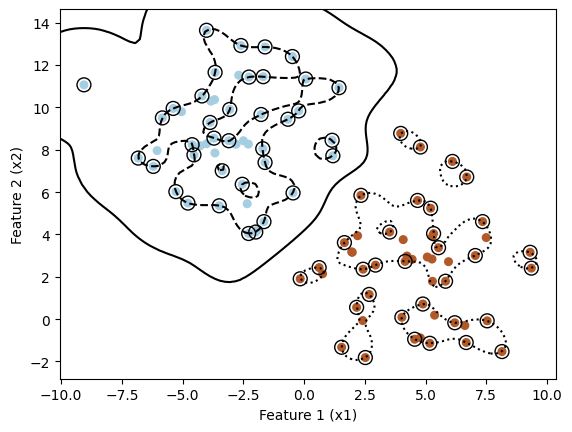

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Create a dataset with non-linear separability
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=2.5)

# Fit the SVC model with an RBF kernel
clf = SVC(kernel="rbf", gamma="auto")
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision boundary using a mesh grid
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100)
)
print(f"xx2 = {xx2}")
# Predict on the mesh grid (for decision boundary plotting)
Z = clf.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
print(f" Z shape before reshape: {Z.shape}")
Z = Z.reshape(xx1.shape)
# print(f"x1 linsoace = {np.linspace(x1_min, x1_max, 100)} \n xx1 shape: {xx1.shape} = {xx1}")
print(
    f"ravel(len = {len(xx1.ravel())}) = {xx1.ravel()},  ravel concatenated= {np.c_[xx1.ravel(), xx2.ravel()]} \n Z shape: {Z.shape} = {Z}"
)


# Plot decision boundary and margins
plt.contour(xx1, xx2, Z, levels=[-1, 0, 1], linestyles=["--", "-", ":"], colors="k")

# plt.contour(xx1, xx2, Zm, levels=[-1, 0, 1], linestyles=['--', '-', ':'], colors='k')
# plt.contour(Zm)

# Highlight support vectors
plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel("Feature 1 (x1)")
plt.ylabel("Feature 2 (x2)")
plt.show()

## Eigenvalues and eigenvectors

Covariance Matrix:
[[2.83292214 1.47511605]
 [1.47511605 1.06937495]]

Eigenvalues (variances in principal directions):
[3.66972122 0.23257587]

Eigenvectors (principal directions):
[[ 0.86979447 -0.4934142 ]
 [ 0.4934142   0.86979447]]


'\nExample Output:\nCovariance Matrix:\n[[ 4.12  0.85]\n [ 0.85  0.28]]\n\nEigenvalues:\n[4.25  0.15]\n\nEigenvectors:\n[[ 0.98  0.21]\n [ 0.21 -0.98]]\n'

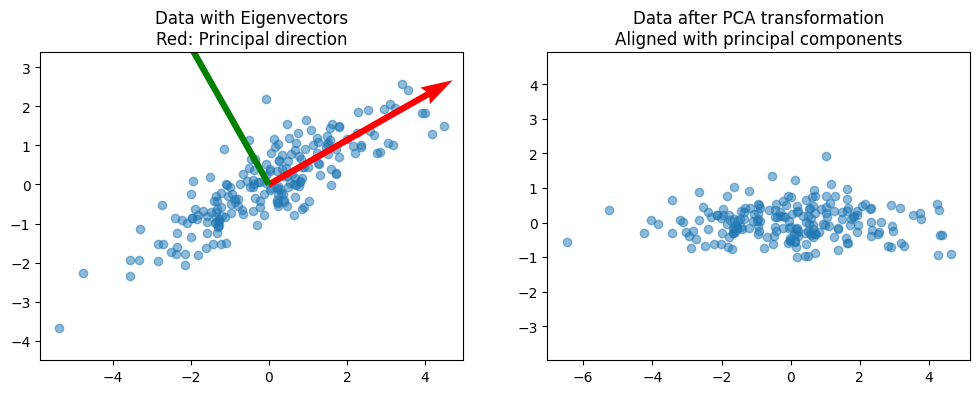

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample 2D data with clear directional variance
np.random.seed(42)
angle = np.pi / 6  # 30 degrees
rotation_matrix = np.array(
    [[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]
)

# Generate data with more variance in one direction
original_data = np.random.randn(200, 2) * np.array([[2, 0.5]])
rotated_data = original_data @ rotation_matrix.T

# Calculate covariance matrix
cov_matrix = np.cov(rotated_data.T)
eigenvals, eigenvecs = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors
idx = eigenvals.argsort()[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:, idx]

# Plot
plt.figure(figsize=(12, 4))

# Original data with eigenvectors
plt.subplot(121)
plt.scatter(rotated_data[:, 0], rotated_data[:, 1], alpha=0.5)
plt.quiver(
    [0, 0],
    [0, 0],
    [eigenvecs[0, 0], eigenvecs[0, 1]],
    [eigenvecs[1, 0], eigenvecs[1, 1]],
    color=["r", "g"],
    scale=2,
    width=0.015,
)
plt.title("Data with Eigenvectors\nRed: Principal direction")
plt.axis("equal")

# Transformed data
transformed_data = rotated_data @ eigenvecs
plt.subplot(122)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5)
plt.title("Data after PCA transformation\nAligned with principal components")
plt.axis("equal")

print("Covariance Matrix:")
print(cov_matrix)
print("\nEigenvalues (variances in principal directions):")
print(eigenvals)
print("\nEigenvectors (principal directions):")
print(eigenvecs)

"""
Example Output:
Covariance Matrix:
[[ 4.12  0.85]
 [ 0.85  0.28]]

Eigenvalues:
[4.25  0.15]

Eigenvectors:
[[ 0.98  0.21]
 [ 0.21 -0.98]]
"""